In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('../Dataset/spam_ham_dataset.csv')

In [4]:
df.shape

(5171, 4)

In [5]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [6]:
df['label'].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

In [7]:
df['label_num'].value_counts()

0    3672
1    1499
Name: label_num, dtype: int64

In [8]:
df.drop(['Unnamed: 0', 'label'], axis=1, inplace=True)

In [9]:
df.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [10]:
import seaborn as sns

<AxesSubplot:xlabel='label_num', ylabel='count'>

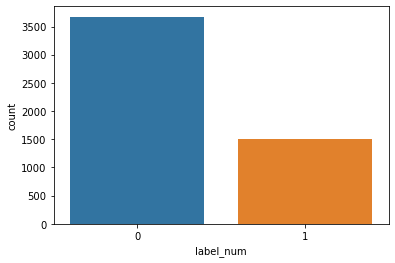

In [12]:
sns.countplot(x=df['label_num'])

In [14]:
df['text'][0]

"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

In [16]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [17]:
stemmer = PorterStemmer()

In [19]:
mails=[]
for i in range(len(df)):
    text = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stopwords.words('english')]
    text = ' '.join(text)
    mails.append(text)

In [20]:
mails

['subject enron methanol meter follow note gave monday preliminari flow data provid daren pleas overrid pop daili volum present zero reflect daili activ obtain ga control chang need asap econom purpos',
 'subject hpl nom januari see attach file hplnol xl hplnol xl',
 'subject neon retreat ho ho ho around wonder time year neon leader retreat time know time year extrem hectic tough think anyth past holiday life go past week decemb januari like think minut calend hand begin fall semest retreat schedul weekend januari youth minist confer brad dustin connect week go chang date follow weekend januari come part need think think agre import us get togeth time recharg batteri get far spring semest lot troubl difficult us get away without kid etc brad came potenti altern get togeth weekend let know prefer first option would retreat similar done past sever year year could go heartland countri inn www com outsid brenham nice place bedroom bedroom hous side side countri real relax also close brenha

In [21]:
len(mails)

5171

In [44]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Bag of Words

In [23]:
cv = CountVectorizer(max_features=5000, lowercase=False)

In [24]:
X = cv.fit_transform(mails).toarray()

In [25]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [26]:
X.shape

(5171, 5000)

In [27]:
y = df['label_num']

In [28]:
y

0       0
1       0
2       0
3       1
4       0
       ..
5166    0
5167    0
5168    0
5169    0
5170    1
Name: label_num, Length: 5171, dtype: int64

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [30]:
X_train.shape

(4136, 5000)

In [31]:
X_test.shape

(1035, 5000)

In [32]:
model = MultinomialNB()

In [33]:
model.fit(X_train, y_train)

MultinomialNB()

In [34]:
model.score(X_train, y_train)

0.9639748549323017

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
y_train_pred = model.predict(X_train)

In [38]:
print(confusion_matrix(y_train, y_train_pred))

[[2820  110]
 [  39 1167]]


In [39]:
y_test_pred = model.predict(X_test)

In [40]:
print(confusion_matrix(y_test, y_test_pred))

[[711  31]
 [ 13 280]]


In [41]:
model.score(X_test, y_test)

0.957487922705314

In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       742
           1       0.90      0.96      0.93       293

    accuracy                           0.96      1035
   macro avg       0.94      0.96      0.95      1035
weighted avg       0.96      0.96      0.96      1035

